## Deep Learning Applied to Images - Object Detection

#### Prof. Thomas da Silva Paula

### SSD demo

* Using SSD with MobileNet-v1 backbone, trained on MSCOCO, from Tensorflow Object Detection API (https://github.com/tensorflow/models/tree/master/research/object_detection)
* Simplified version of original Tensorflow demonstration

### Imports

In [1]:
import cv2
import json
import pprint

import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as patches


plt.rcParams['figure.figsize'] = [14, 10]

### Useful methods

In [2]:
def read_img(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

def image_to_nparray(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

def load_coco_dict(labels_path):
    with open(labels_path, 'r') as f:
        coco_labels = json.load(f)

    labels_dict = {}
    for info in coco_labels['labels']:
        labels_dict[info['id']] = info['label']
        
    return labels_dict

### Loading trained model and COCO labels

In [3]:
model_checkpoint = 'trained_models/ssd_mobilenet_v1_fpn_640x640_coco17_tpu-8/saved_model/'
labels_path = 'coco_labels.txt'

In [4]:
%%time
model = tf.saved_model.load(model_checkpoint)
model

Wall time: 12.6 s


<tensorflow.python.saved_model.load.Loader._recreate_base_user_object.<locals>._UserObject at 0x25cc514df48>

In [5]:
labels_dict = load_coco_dict(labels_path)

In [6]:
print(labels_dict[2])

bicycle


### Inspecting image

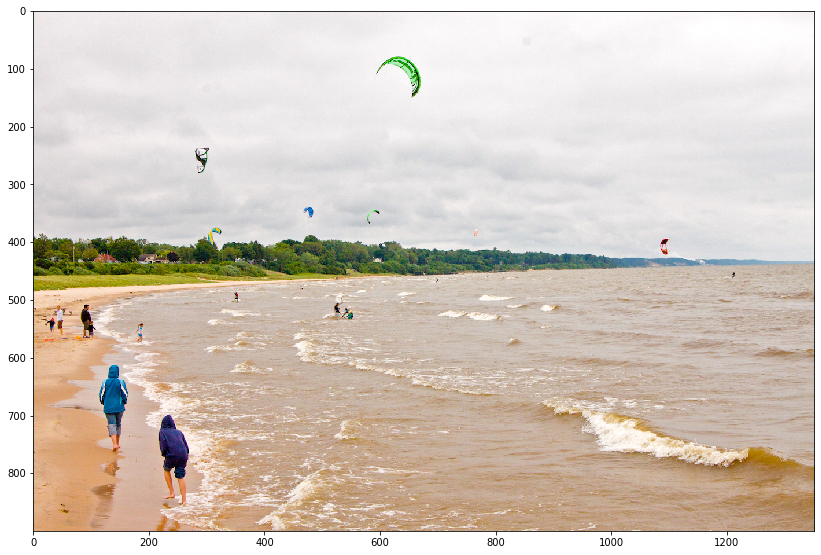

In [7]:
img_path = 'sample_images/beach.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

### Running inference

In [8]:
%%time
img = read_img(img_path)
img = cv2.resize(img, (640, 640))
img = np.asarray(img, dtype='float32')
img = np.expand_dims(img, axis=0)
output_dict = model(img)

Wall time: 9.54 s


In [9]:
pprint.pprint(output_dict)

{'detection_anchor_indices': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 5027., 28853., 32729., 22594., 51104., 51074., 10666., 22576.,
        16422., 21786., 23104., 21780., 22572., 22266., 22566., 14562.,
        49467., 20754., 15084., 51042., 22090., 50613., 28372., 15942.,
        50727., 31768., 21796., 15948., 21234., 19620., 50673., 22086.,
        22260., 17188., 22092., 22588., 51104., 51048., 14604., 16104.,
        21300., 49591., 21616., 21774., 20766., 23052., 22104., 49227.,
        22584., 17658., 28826., 50593., 50719., 22560., 27888., 15084.,
        27886., 23592., 22582., 22098., 16584., 23058., 22084., 14082.,
        14562., 22262., 21634., 50619., 21306., 51040., 23064., 22278.,
        16416., 20316., 45616., 19146., 49351., 49599., 28372., 21612.,
        14598., 50653., 17676., 32248., 50018., 21432., 22254., 22746.,
        20274., 14562., 32248., 23080., 22266., 20760., 21610., 21798.,
        21246., 16426., 20280., 23070.]], dtype=float32)>

### Plot detections
Using the `confidence_threshold`

kite
person


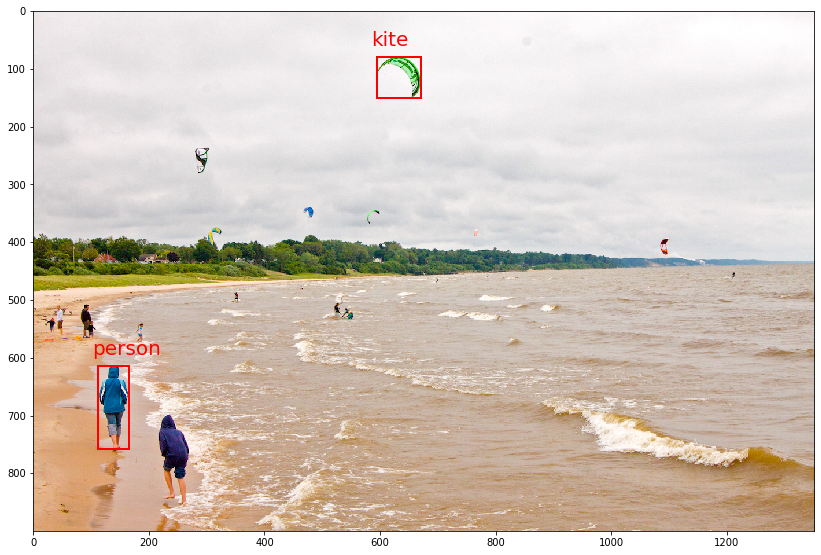

In [13]:
fig, ax = plt.subplots(1)
img = read_img(img_path)
confidence_threshold = .5

for boxes, score, cls_id in zip(output_dict['detection_boxes'][0],
                                output_dict['detection_scores'][0],
                                output_dict['detection_classes'][0]):
    ymin, xmin, ymax, xmax = boxes
    if score > confidence_threshold:
        (left, right, top, bottom) = (xmin * width, xmax * width,
                                      ymin * height, ymax * height)
        rect = patches.Rectangle((left, top),
                                 right-left,
                                 bottom-top,
                                 linewidth=2, edgecolor='r',
                                 facecolor='none')
        ax.add_patch(rect)
        plt.text(left-10, top-20, labels_dict[cls_id.numpy()], fontsize=20, color='r')
        print(labels_dict[cls_id.numpy()])
ax.imshow(img)

### Testing with other images

In [14]:
def predict_and_plot(img_path, width, height, confidence_threshold=.8):
    img = read_img(img_path)
    img = cv2.resize(img, (640, 640))
    img = np.asarray(img, dtype='float32')
    img = np.expand_dims(img, axis=0)
    
    output_dict = model(img)
    
    fig, ax = plt.subplots(1)
    img = read_img(img_path)

    for boxes, score, cls_id in zip(output_dict['detection_boxes'][0],
                                    output_dict['detection_scores'][0],
                                    output_dict['detection_classes'][0]):
        ymin, xmin, ymax, xmax = boxes
        if score > confidence_threshold:
            (left, right, top, bottom) = (xmin * width, xmax * width,
                                          ymin * height, ymax * height)
            rect = patches.Rectangle((left, top),
                                     right-left,
                                     bottom-top,
                                     linewidth=2, edgecolor='r',
                                     facecolor='none')
            ax.add_patch(rect)
            plt.text(left-10, top-20, labels_dict[cls_id.numpy()], fontsize=20, color='r')
            print(labels_dict[cls_id.numpy()])
    ax.imshow(img)

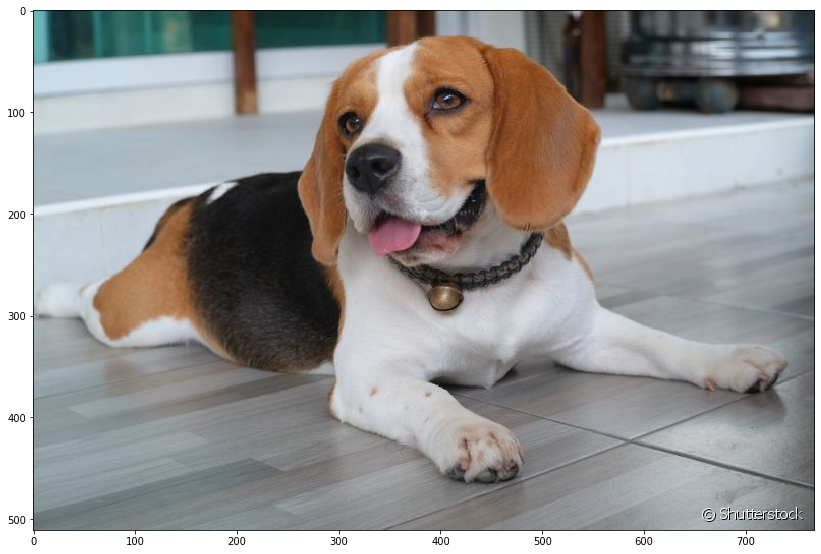

In [15]:
img_path = 'sample_images/dog2.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

dog


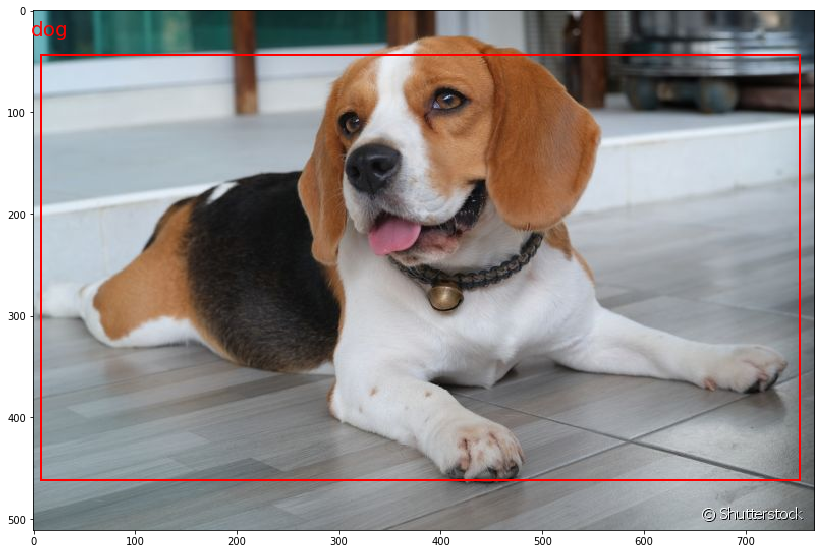

In [16]:
predict_and_plot(img_path, width, height, confidence_threshold=.5)

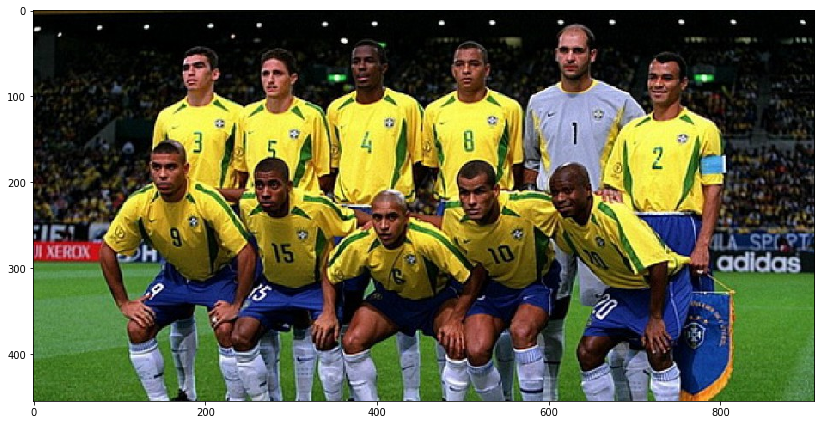

In [17]:
img_path = 'sample_images/soccer.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

person
person
person
person
person
person
person
person
person
person
person


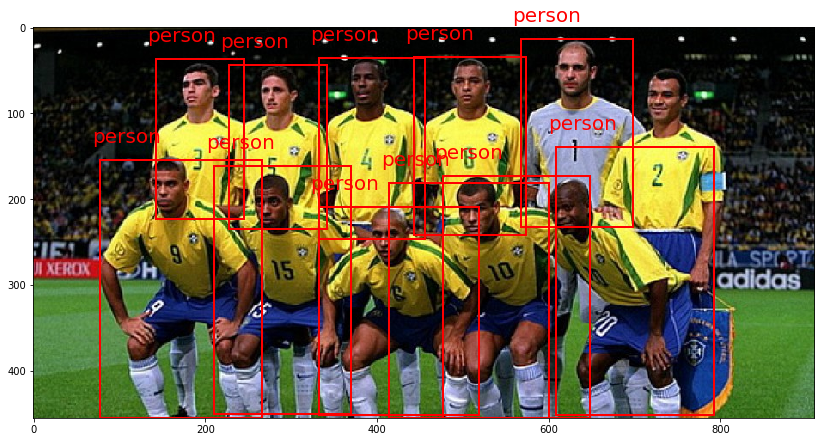

In [21]:
predict_and_plot(img_path, width, height, confidence_threshold=.4)

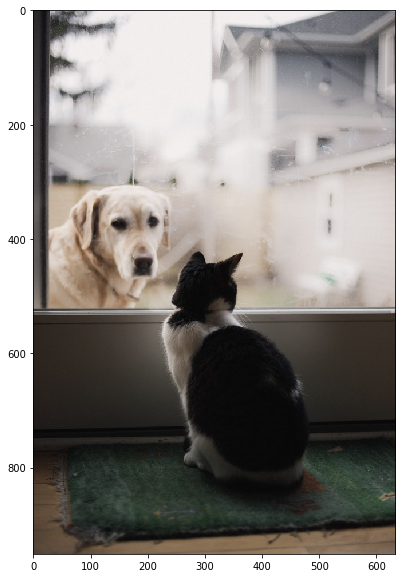

In [22]:
img_path = 'sample_images/cat_dog.jpg'
img = read_img(img_path)
height, width, _ = img.shape
plt.imshow(img)

dog
cat


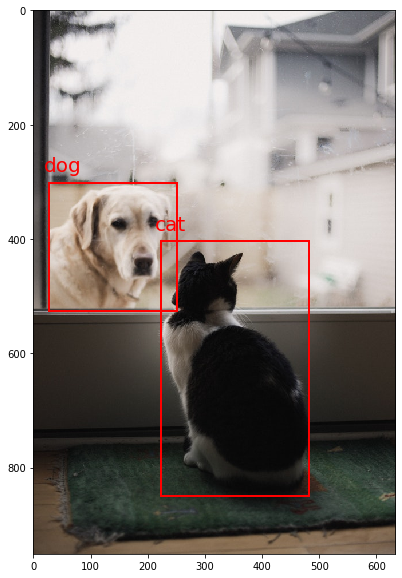

In [23]:
predict_and_plot(img_path, width, height, confidence_threshold=.7)